# **Building a Sarcasm Detector using Embeddings**

**Making Sentiment Programmable Using Embeddings**

### **Establishing Meaning from Words**

Use **Sarcasm dataset**

$\rightarrow$ Encode all the words that **make up `sarcastic headlines` with `positive numbers`** and those that **make up `realistic headlines` with `negative numbers`**.

**A Simple Example: Positives and Negatives**

**The sarcastic headline** from the dataset: 

```Python
christian bale given neutered male statuette named oscar
```

Assuming that all words in the vocabulary start with **0** $\rightarrow$ **Add 1** to the values for each of the words in sentence

```Python
{ "christian" : 1, "bale" : 1, "given" : 1, "neutered": 1, "male" : 1, "statuette": 1, "named" : 1, "oscar": 1}
```

Then, consider **an ordinary headline**, not a sarcastic one:

```Python

gareth bale scores wonder goal against germany

```

Because of different sentiment $\rightarrow$ **Subtract 1** from the current value of each word


```Python

{ "christian" : 1, "bale" : 0, "given" : 1, "neutered": 1, "male" : 1,
 "statuette": 1, "named" : 1, "oscar": 1, "gareth" : -1, "scores": -1,
 "wonder" : -1, "goal" : -1, "against" : -1, "germany" : -1}

```

Establish the sentiment of this sentence:

```Python

neutered male named against germany, wins statuette!

```

Using the existing value set $\rightarrow$ Look at the scores of each word and add them up

$\Rightarrow$ Score = 2 

$\Rightarrow$ A sarcastic sentence because it’s a positive number

### **Going a Little Deeper: Vectors**

The computer doesn’t understand the meanings of individual words 

$\rightarrow$ Move labelled words from **a known sarcastic headline** in one direction **(by adding 1)** 

and 

$\rightarrow$ Move labelled words from **a known normal headline** in another direction **(by subtracting 1)**

This gives us a basic understanding of the meaning of the words, but it does lose some **`nuance`**

**What if we increased the dimensionality of the direction to try to capture some more information?**

Supposing, examine characters from **Jane Austen's Pride and Prejudice**, considering the dimensions of **`gender`** and **`nobility`**. 

$\rightarrow$ Plot the former **on the x-axis** and **the y-axis**, with the length of the vector denoting each character’s wealth

<center>

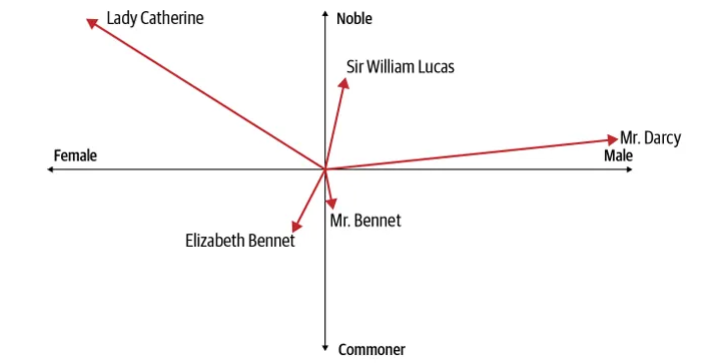

<caption>Characters in Pride and Prejudice as vectors</caption>

</center>

The $x$ and $y$ coordinates **give the embeddings** for a particular character from the book

- Three of them are **male**
- **Mr. Darcy** is extremely wealthy, but his nobility isn’t clear 
- **Mr. Bennet** is not nobility and is struggling financially
- **Elizabeth Bennet**, his daughter, is similar to him, but female
- **Lady Catherine**, the female, is nobility and incredibly wealthy
- **The romance** between **Mr. Darcy** and **Elizabeth** causes tension—prejudice coming from the noble side of the vectors toward the less-noble


$\Rightarrow$ By considering **multiple dimensions** $\rightarrow$ See **real meaning** in words 

$\Rightarrow$ **Not talking about concrete definitions**, but more **a relative meaning** based on **the axes** and **the relation** between **the vector for one word** and **the other vectors**

$\Rightarrow$ **`Embedding`** - a vector representation of a word that is learned while training a neural network

### **Embeddings in TensorFlow**

Creates **a lookup table** that **maps** from **an integer** to **an embedding table** and **the contents** of which are **`the coefficients of the vector`** representing the word identified by that **integer**

**The vector's direction** in the vector space could be seen as **encoding the “meaning” of a word**, and words with **`similar vectors`** or **`pointing in roughly the same direction`** $\rightarrow$ related to that word

In [5]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
import seaborn as sns

# Remove the HTML tags
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
import json

# Take the stopwords
import spacy
import string 

en = spacy.load("en_core_web_lg")
stopwords = en.Defaults.stop_words

In [6]:
datastore = []
table = str.maketrans('', '', string.punctuation)

with open ('./datasets/rmisra/news-headlines-dataset-for-sarcasm-detection/versions/2/Sarcasm_Headlines_Dataset_v2.json') as jsonFile:
    for line in jsonFile:
        line = json.loads(line)
        datastore.append(line)      
        
sentences = []
labels = []  

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

# Preprocessing the data
for i, sentence in enumerate(sentences):
    # Remove if have HTML tags
    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    
    sentence = sentence.lower()
    sentence = sentence.replace(",", " , ")
    sentence = sentence.replace(".", " . ")
    sentence = sentence.replace("-", " - ")
    sentence = sentence.replace("/", " / ")
    
    filter_sentence = ""
    words = sentence.split()
    
    for word in words:
        word = word.translate(table)
        if word not in stopwords:
            filter_sentence = filter_sentence + word + " "
    
    sentences[i] = filter_sentence

C:\Users\nguye\AppData\Local\Temp\ipykernel_41656\192678232.py:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(sentence)


In [7]:
train_size = 23000

train_set = sentences[:train_size]
test_set = sentences[train_size:]

train_label = labels[:train_size]
test_label = labels[train_size:]

Converted to **Numpy format**, used by **TensorFlow** for **training**

In [8]:
# Convert the training set into numpy array
train_set = np.array(train_set)
train_label = np.array(train_label)

test_set = np.array(test_set)
test_label = np.array(test_label)


In [9]:
vocal_size = 10000
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words=vocal_size, oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)

In [10]:
word_index = tokenizer.word_index

word_index

{'<OOV>': 1,
 'new': 2,
 'trump': 3,
 'man': 4,
 'report': 5,
 'year': 6,
 'day': 7,
 'woman': 8,
 'u': 9,
 'area': 10,
 's': 11,
 'time': 12,
 'says': 13,
 'donald': 14,
 'like': 15,
 'old': 16,
 'life': 17,
 'people': 18,
 'trumps': 19,
 'house': 20,
 'white': 21,
 'obama': 22,
 'women': 23,
 '5': 24,
 'clinton': 25,
 'world': 26,
 'years': 27,
 'family': 28,
 'way': 29,
 'americans': 30,
 'black': 31,
 'study': 32,
 'american': 33,
 'school': 34,
 'gop': 35,
 'bill': 36,
 '3': 37,
 'finds': 38,
 'best': 39,
 'nation': 40,
 'know': 41,
 'cant': 42,
 'police': 43,
 'going': 44,
 '10': 45,
 'watch': 46,
 'good': 47,
 'death': 48,
 'state': 49,
 'home': 50,
 'president': 51,
 'video': 52,
 '2': 53,
 'big': 54,
 'things': 55,
 'love': 56,
 'parents': 57,
 'campaign': 58,
 'mom': 59,
 'right': 60,
 'health': 61,
 'getting': 62,
 'party': 63,
 'work': 64,
 'hillary': 65,
 'kids': 66,
 '000': 67,
 'self': 68,
 'gets': 69,
 'dead': 70,
 'little': 71,
 'high': 72,
 'need': 73,
 'doesnt': 74,


In [11]:
train_sequence = tokenizer.texts_to_sequences(train_set)
test_sequence = tokenizer.texts_to_sequences(test_set)


train_sequence_padded = pad_sequences(train_sequence, padding='post', maxlen=100)  
test_sequence_padded = pad_sequences(test_sequence, padding='post', maxlen=100)  

Initializing **the embedding layer**
- **`vocal_size`**
- **`embedding_dim` (embedding dimensions)** - Every word in the vocabulary will be assigned a **`embedding_dim`** dimensional vector

Feeding **the embedding layer's output** into **the dense layer**

The easiest way to do this, **similar to when using a  CNN**, is to use **`pooling`**

$\Rightarrow$ The dimensions of the embeddings **are averaged out** to produce **a fixed-length output vector**

In [12]:
# As an example, consider this model architecture:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_history = model.fit(train_sequence_padded, train_label, validation_data=(test_sequence_padded, test_label), epochs=30)

Epoch 1/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5231 - loss: 0.6918 - val_accuracy: 0.5273 - val_loss: 0.6902
Epoch 2/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5414 - loss: 0.6870 - val_accuracy: 0.5414 - val_loss: 0.6644
Epoch 3/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6600 - loss: 0.6313 - val_accuracy: 0.6316 - val_loss: 0.6168
Epoch 4/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7573 - loss: 0.5109 - val_accuracy: 0.7019 - val_loss: 0.5450
Epoch 5/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8062 - loss: 0.4289 - val_accuracy: 0.7822 - val_loss: 0.4533
Epoch 6/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8371 - loss: 0.3688 - val_accuracy: 0.8021 - val_loss: 0.4245
Epoch 7/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8487 - loss: 0.3456 - val_accuracy: 0.8069 - val_loss: 0.4190
Epoch 8/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8577 - loss: 0.3268 - val_accuracy: 0.

In [13]:
model.predict(test_sequence_padded)

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step


array([[0.5561876 ],
       [0.03782909],
       [0.9999112 ],
       ...,
       [0.04322191],
       [0.9992697 ],
       [0.95048445]], dtype=float32)

**Visualizing the accuracy**

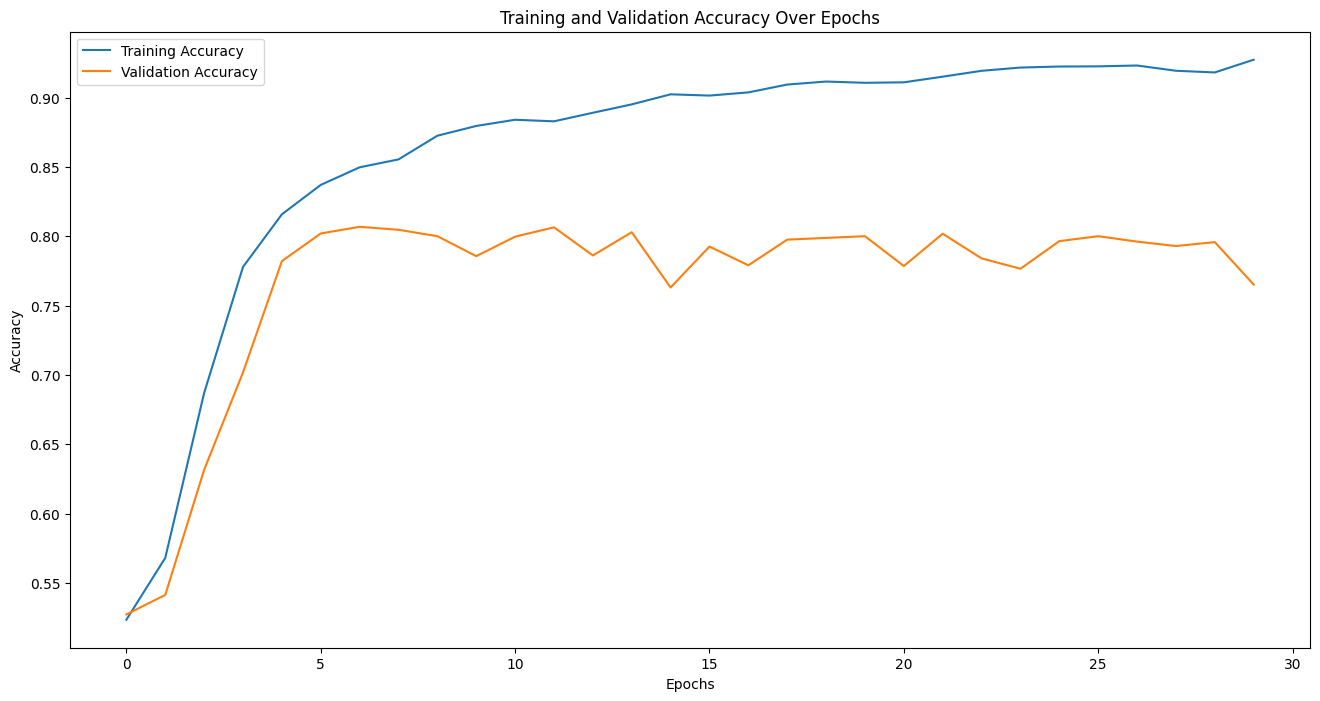

In [14]:
# Extract history
result = model_history.history

# Define epochs and accuracy data
epochs = [i for i in range(len(result['accuracy']))]  
acc = result['accuracy']
val_acc = result['val_accuracy']

# Plot accuracy and validation accuracy
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=acc, label='Training Accuracy')  
sns.lineplot(x=epochs, y=val_acc, label='Validation Accuracy') 

# Add labels and legend
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()

# Show plot
plt.show()

The pretty decent accuracy of **`93+%`** after 30 epochs—but the validation accuracy is about **`77+%`**

**Comments**
- Seem to be **a reasonable curve** given that **the validation data** likely contains **many words that aren’t present in the training data**. 

**Visualizing the loss**

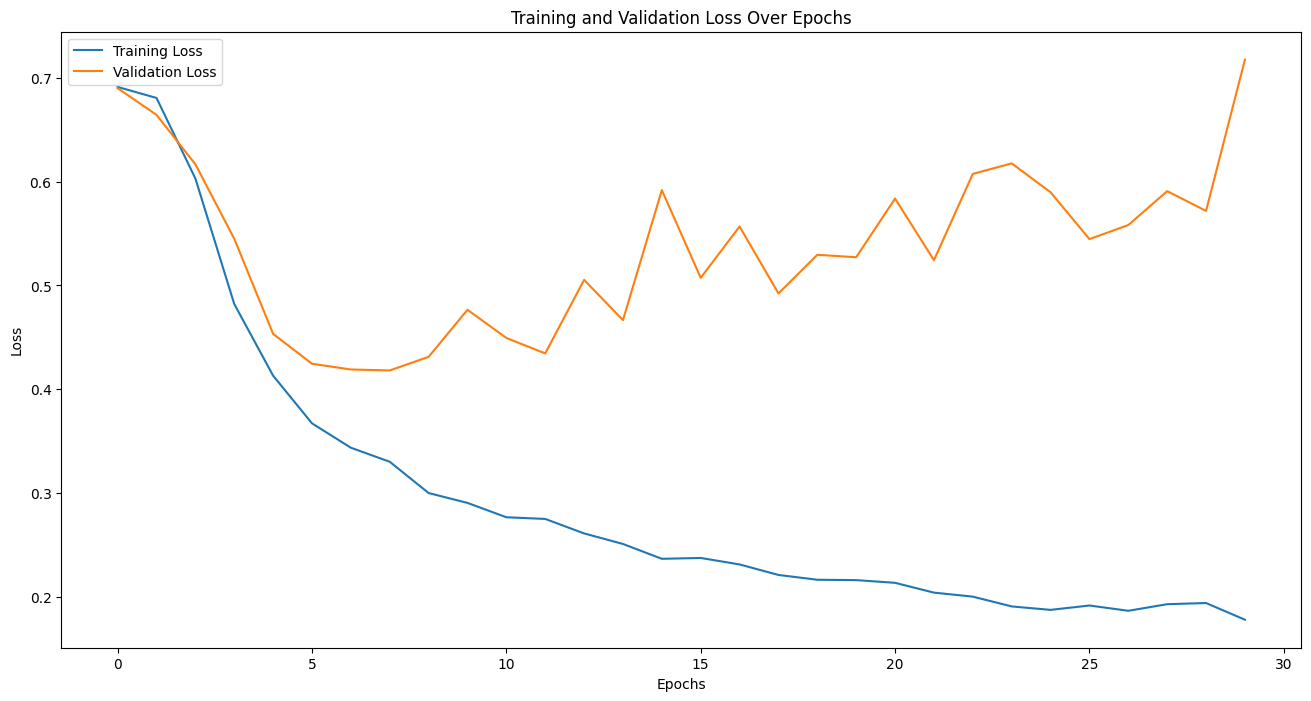

In [15]:
# Extract history
result = model_history.history

# Define epochs and loss data
epochs = [i for i in range(len(result['loss']))]  
lss = result['loss']
val_lss = result['val_loss']

# Plot loss and validation loss
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=lss, label='Training Loss')  
sns.lineplot(x=epochs, y=val_lss, label='Validation Loss') 

# Add labels and legend
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()

# Show plot
plt.show()

Expecting **the training accuracy is higher than the validation accuracy**, a clear indicator of **overfitting** is that while **the validation accuracy is `dropping` a little over time**, **its loss is `increasing` sharply**

**Note**: **`Overfitting`** is common with NLP models due to **the somewhat unpredictable nature of language**.

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 481,301 (1.84 MB)

 Trainable params: 160,433 (626.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 320,868 (1.22 MB)

**The embedding** has a **10000-word vocabulary** and each word will be a vector in **16 dimensions** 

$\Rightarrow$ The total number of trainable parameters = **160000**

**The average pooling layer** has **0 trainable parameters** - as it’s just averaging the parameters in the embedding layer, **to get a single 16-value vector**

Then fed into the **24-neuron dense layer** $\Rightarrow$ Need to learn **(24 × 16) + 16 = 408 parameters**

The output is then passed to **the final single-neuron layer** $\Rightarrow$ Need to learn **(1 × 24) + 1 = 25 parameters**

### **Reducing Overfitting in Language Models**

**Overfitting** happens when the network becomes overspecialized to the training data, and one part of this is that it has become very good at matching patterns in **noisy** data in the training set that doesn’t exist anywhere else $\Rightarrow$ This **noise** isn’t present in the validation set

$\Rightarrow$ **The better the network gets at matching it**, **the worse the loss of the validation set will be**

### **Several ways to generalize the model and reduce overfitting**

### **Adjusting the learning rate**

If the **learning rate of optimizer** is too **high** $\rightarrow$ the network **learns too quickly** $\rightarrow$ **overfitting**  (the biggest factor)

For example

```Python
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
```

The optimizer is **``adam``** with default parameters but **`adam`** supports multiple parameters, including **learning rate**

In [17]:
# As an example, consider this model architecture:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

where **the learning rate default** is **0.001**, has been **reduced by 90%** to **0.0001**

The `beta_1` and `beta_2` stay at defaults, as does `amsgrad`

`beta_1` and `beta_2` must be between 0 and 1, and both are close to 1

`Amsgrad` is **an alternative implementation** of the implementation of the Adam optimizer, introduced in the paper **"On the Convergence of Adam and Beyond"** by Sashank Reddi, Satyen Kale, and Sanjiv Kumar.

In [18]:
model_history = model.fit(train_sequence_padded, train_label, validation_data=(test_sequence_padded, test_label), epochs=100)

Epoch 1/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5177 - loss: 0.6926 - val_accuracy: 0.5273 - val_loss: 0.6913
Epoch 2/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5226 - loss: 0.6918 - val_accuracy: 0.5273 - val_loss: 0.6911
Epoch 3/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5313 - loss: 0.6906 - val_accuracy: 0.5273 - val_loss: 0.6910
Epoch 4/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5180 - loss: 0.6915 - val_accuracy: 0.5273 - val_loss: 0.6901
Epoch 5/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5260 - loss: 0.6900 - val_accuracy: 0.5273 - val_loss: 0.6893
Epoch 6/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5222 - loss: 0.6897 - val_accuracy: 0.5279 - val_loss: 0.6885
Epoch 7/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5255 - loss: 0.6883 - val_accuracy: 0.5291 - val_loss: 0.6870
Epoch 8/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5275 - loss: 0.6865 - val_accu

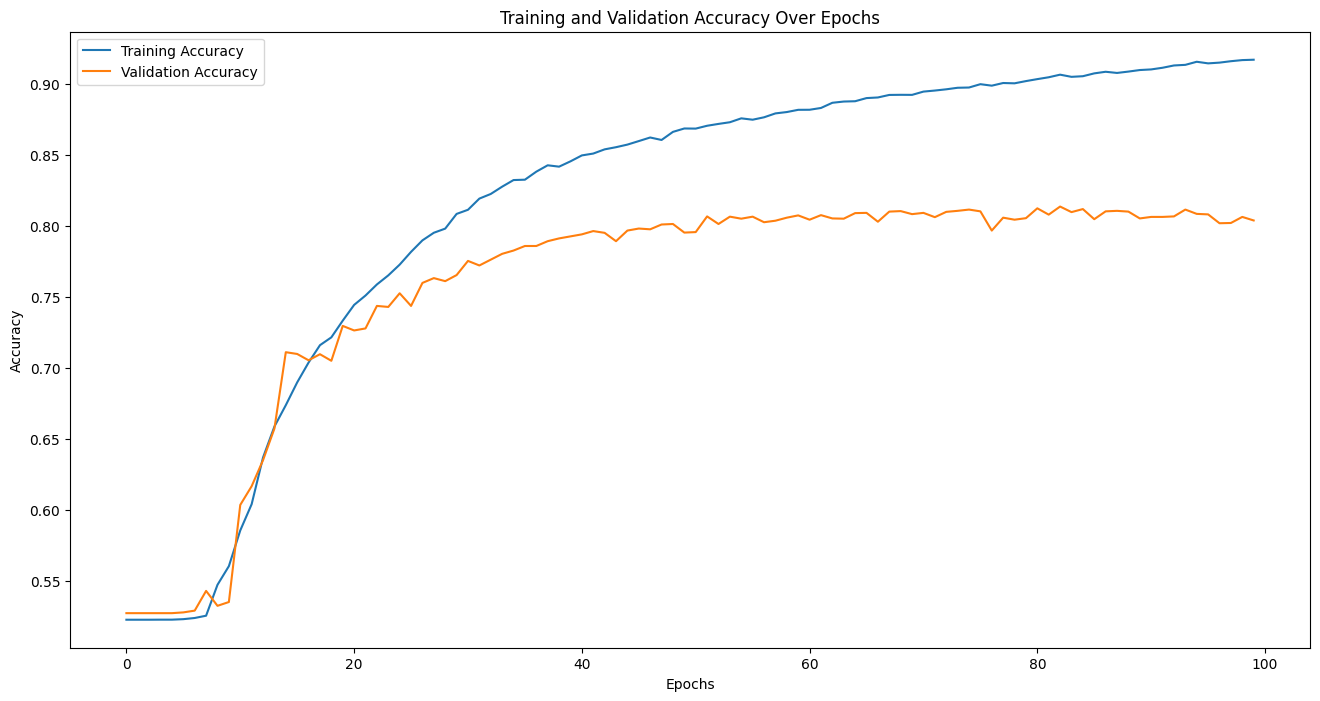

In [19]:
# Extract history
result = model_history.history

# Define epochs and accuracy data
epochs = [i for i in range(len(result['accuracy']))]  
acc = result['accuracy']
val_acc = result['val_accuracy']

# Plot accuracy and validation accuracy
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=acc, label='Training Accuracy')  
sns.lineplot(x=epochs, y=val_acc, label='Validation Accuracy') 

# Add labels and legend
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()

# Show plot
plt.show()

The **lower learning rate** has a impact on the network $\rightarrow$ In the first 10 epochs or so, where it appears that the network isn’t learning, before it starts to learn quickly.

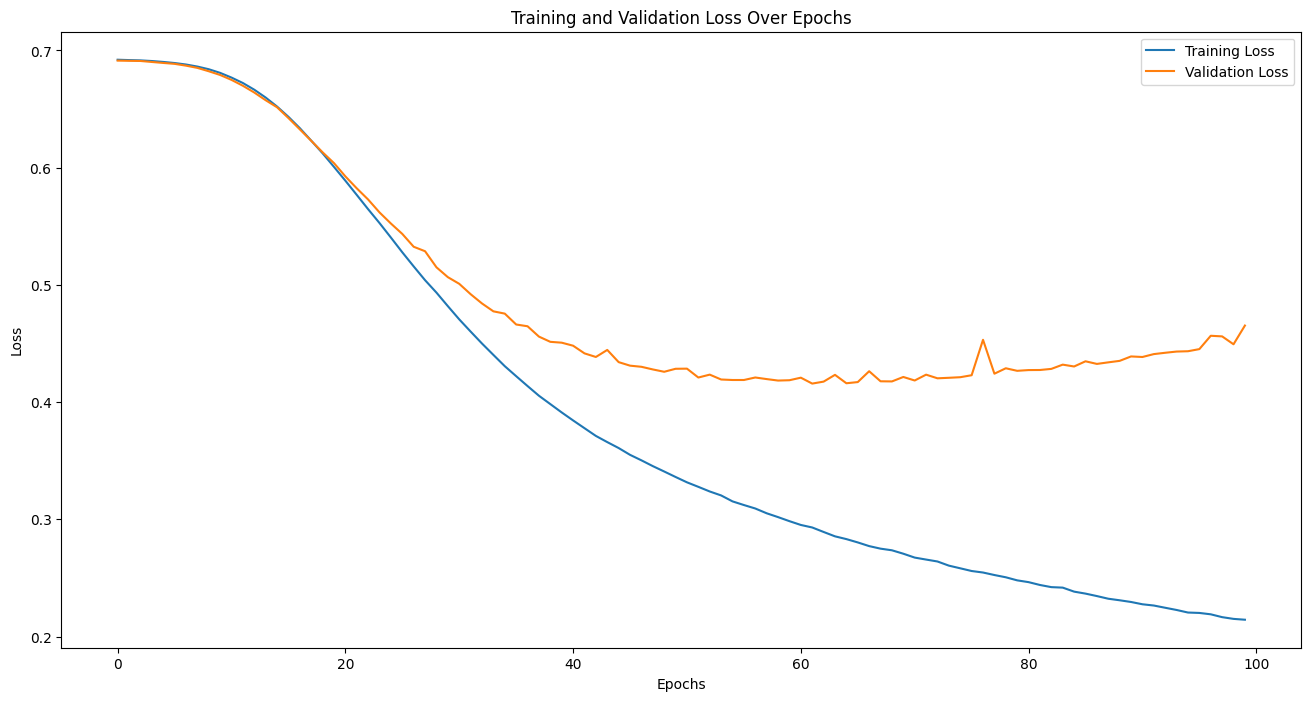

In [20]:
# Extract history
result = model_history.history

# Define epochs and loss data
epochs = [i for i in range(len(result['loss']))]  
lss = result['loss']
val_lss = result['val_loss']

# Plot loss and validation loss
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=lss, label='Training Loss')  
sns.lineplot(x=epochs, y=val_lss, label='Validation Loss') 

# Add labels and legend
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()

# Show plot
plt.show()

Even while **the accuracy wasn’t going up** for the first few epochs, **the loss was going down** $\rightarrow$ the network would **start to learn** epoch by epoch

And while the loss does start to show the same curve of **overfitting** $\rightarrow$ happens much later, and at a much lower rate. By epoch 30 the loss is at about **0.45**, whereas with the higher learning rate as previous model, it was **more than double that amount**

The loss on the validation set started to **increase at about epoch 60**, at which point **the training set had 90% accuracy** and **the validation set about 81%** $\rightarrow$ quite an effective network

$\Rightarrow$ The network takes time longer to get to a good accuracy rate, it does so with less loss $\rightarrow$ more confident in the results

### **Exploring vocabulary size**

The Sarcasm dataset deals with words $\rightarrow$ explore the words and frequency $\rightarrow$ get a clue to fix the **overfitting** issue

The tokenizer gives **`word_counts`** property and an **`OrderedDict`** containing tuples of word and word count:

In [21]:
wc = tokenizer.word_counts
print(wc)

OrderedDict({'thirtysomething': 1, 'scientists': 103, 'unveil': 13, 'doomsday': 5, 'clock': 18, 'hair': 62, 'loss': 39, 'dem': 4, 'rep': 25, 'totally': 55, 'nails': 13, 'congress': 141, 'falling': 24, 'short': 43, 'gender': 31, 'racial': 22, 'equality': 25, 'eat': 48, 'veggies': 2, '9': 131, 'deliciously': 1, 'different': 64, 'recipes': 30, 'inclement': 2, 'weather': 29, 'prevents': 5, 'liar': 8, 'getting': 211, 'work': 210, 'mother': 86, 'comes': 79, 'pretty': 119, 'close': 46, 'word': 74, 'streaming': 10, 'correctly': 5, 'white': 378, 'inheritance': 3, '5': 318, 'ways': 129, 'file': 9, 'taxes': 17, 'stress': 33, 'richard': 24, 'bransons': 1, 'global': 53, 'warming': 7, 'donation': 13, 'nearly': 39, 'cost': 31, 'failed': 31, 'balloon': 12, 'trips': 9, 'shadow': 14, 'government': 121, 'large': 27, 'meet': 87, 'marriott': 1, 'conference': 28, 'room': 105, 'b': 28, 'lots': 16, 'parents': 220, 'know': 246, 'scenario': 4, 'lesbian': 16, 'considered': 13, 'father': 88, 'indiana': 11, 'amazi

**The order of the words is determined by their order of appearance within the dataset**

Sort the **OrderedDict** into **descending order of word volume**

In [22]:
from collections import OrderedDict

newlist = (OrderedDict(sorted(wc.items(), key=lambda t: t[1], reverse=True)))

newlist

OrderedDict([('new', 1684),
             ('trump', 1429),
             ('man', 1390),
             ('report', 604),
             ('year', 546),
             ('day', 517),
             ('woman', 507),
             ('u', 507),
             ('area', 500),
             ('s', 496),
             ('time', 490),
             ('says', 485),
             ('donald', 476),
             ('like', 454),
             ('old', 418),
             ('life', 407),
             ('people', 406),
             ('trumps', 405),
             ('house', 394),
             ('white', 378),
             ('obama', 368),
             ('women', 342),
             ('5', 318),
             ('clinton', 314),
             ('world', 308),
             ('years', 307),
             ('family', 299),
             ('way', 298),
             ('americans', 297),
             ('black', 282),
             ('study', 277),
             ('american', 269),
             ('school', 265),
             ('gop', 263),
             ('bill', 260)

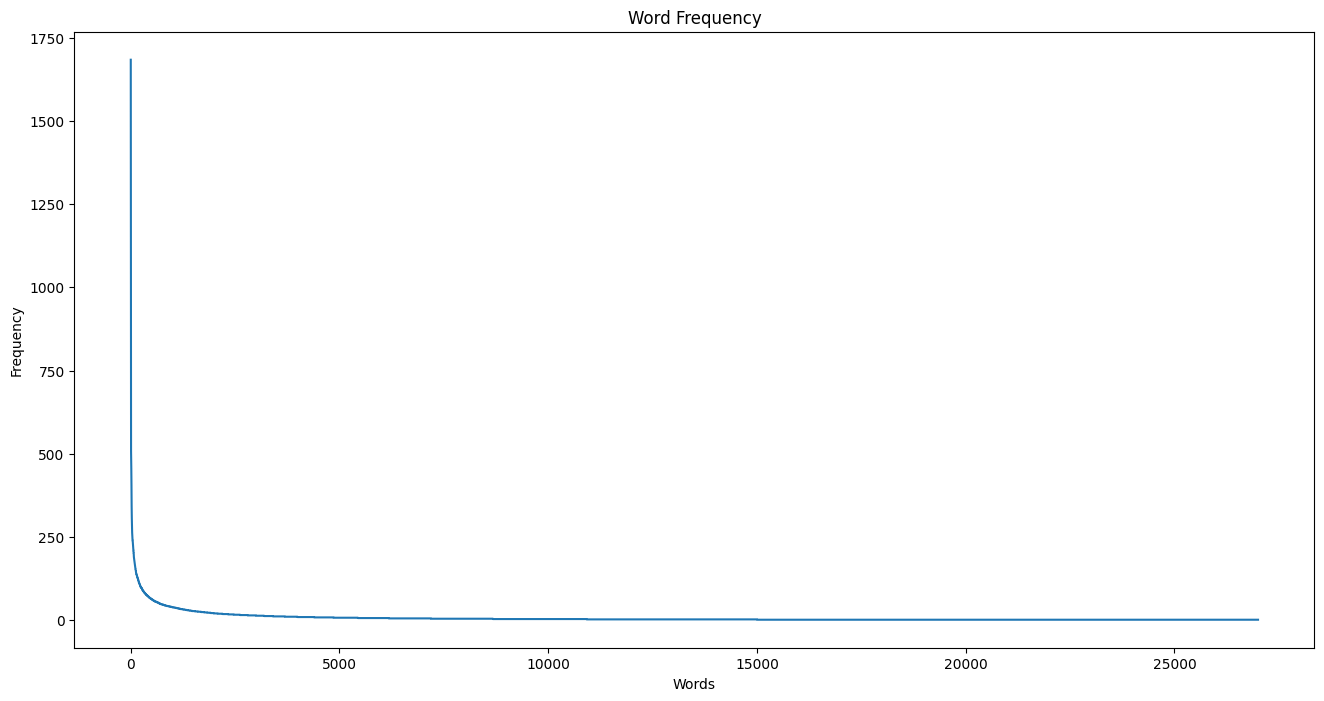

In [23]:
xs=[]
ys=[]
curr_x = 1

for item in newlist:
    xs.append(curr_x)
    curr_x=curr_x+1
    ys.append(newlist[item])

plt.figure(figsize=(16, 8))
plt.title('Word Frequency')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.plot(xs,ys)
plt.show()

This curve shows **very few words are used many times**, whereas **most words are used very few times**

**But every word is effectively weighted equally because every word has an “entry” in the embedding**

By having a **relatively large** training set in comparison with the validation set $\rightarrow$ many words present in the training set that aren’t present in the validation set

Zooming in by changing the axis of the plot just by calling **`plt.axis()`**

Look at the volume of words 300 to 10,000 on the x-axis with the scale from 0 to 100 on the y-axis

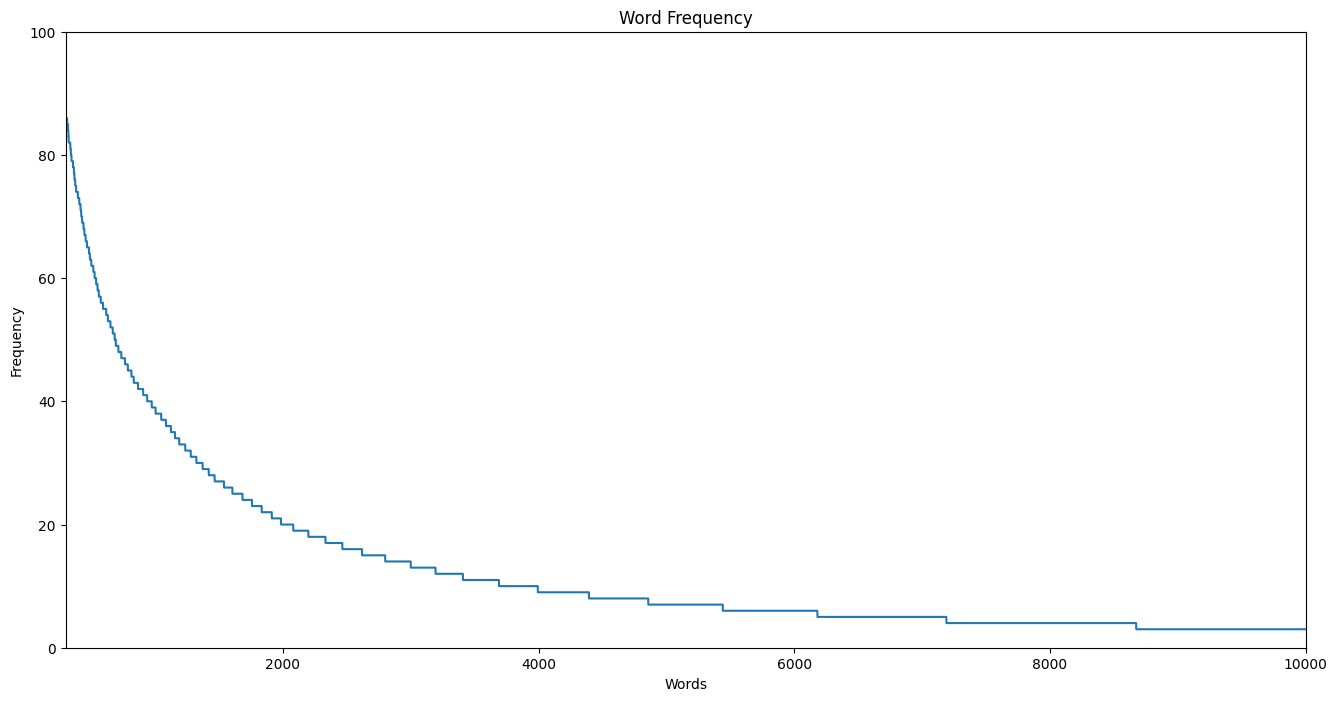

In [24]:
plt.figure(figsize=(16, 8))
plt.title('Word Frequency')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.plot(xs,ys)
plt.axis([300,10000,0,100])
plt.show()

**Over 20,000 words** in the corpus, the code is set up to only train for **10,000**

But if looking at the words in positions **2,000–10,000**, which is **over 80% of our vocabulary**, they are **used less than 20 times** in the entire corpus $\rightarrow$ Could explain the **overfitting**

**What happens if you change the vocab size to two thousand and retrain?**

In [25]:
vocal_size = 2000
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words=vocal_size, oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)

train_sequence = tokenizer.texts_to_sequences(train_set)
test_sequence = tokenizer.texts_to_sequences(test_set)

train_sequence_padded = pad_sequences(train_sequence, padding='post', maxlen=100)  
test_sequence_padded = pad_sequences(test_sequence, padding='post', maxlen=100) 

# As an example, consider this model architecture:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(2000, 16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_history = model.fit(train_sequence_padded, train_label, validation_data=(test_sequence_padded, test_label), epochs=30)

Epoch 1/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5238 - loss: 0.6911 - val_accuracy: 0.5343 - val_loss: 0.6792
Epoch 2/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5908 - loss: 0.6685 - val_accuracy: 0.6560 - val_loss: 0.6202
Epoch 3/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6692 - loss: 0.6108 - val_accuracy: 0.6063 - val_loss: 0.6368
Epoch 4/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7157 - loss: 0.5551 - val_accuracy: 0.6910 - val_loss: 0.5587
Epoch 5/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7548 - loss: 0.5064 - val_accuracy: 0.7535 - val_loss: 0.4898
Epoch 6/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7724 - loss: 0.4708 - val_accuracy: 0.7507 - val_loss: 0.4915
Epoch 7/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7846 - loss: 0.4519 - val_accuracy: 0.7484 - val_loss: 0.4998
Epoch 8/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7845 - loss: 0.4464 - val_accuracy: 0.

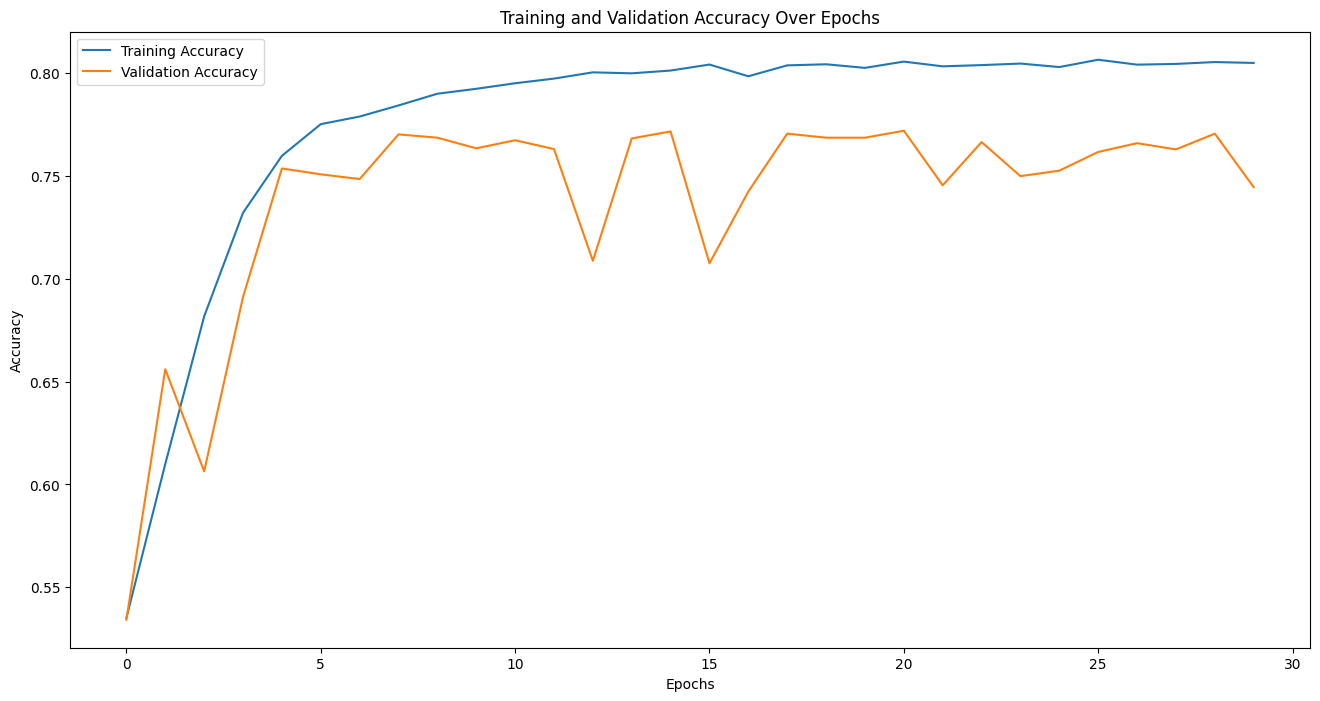

In [26]:
# Extract history
result = model_history.history

# Define epochs and accuracy data
epochs = [i for i in range(len(result['accuracy']))]  
acc = result['accuracy']
val_acc = result['val_accuracy']

# Plot accuracy and validation accuracy
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=acc, label='Training Accuracy')  
sns.lineplot(x=epochs, y=val_acc, label='Validation Accuracy') 

# Add labels and legend
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()

# Show plot
plt.show()

Now the training set accuracy is **~82%** and the validation accuracy is about **~76%** $\rightarrow$ closer to each other and not diverging $\rightarrow$ a good sign of getting rid of most of the **overfitting**

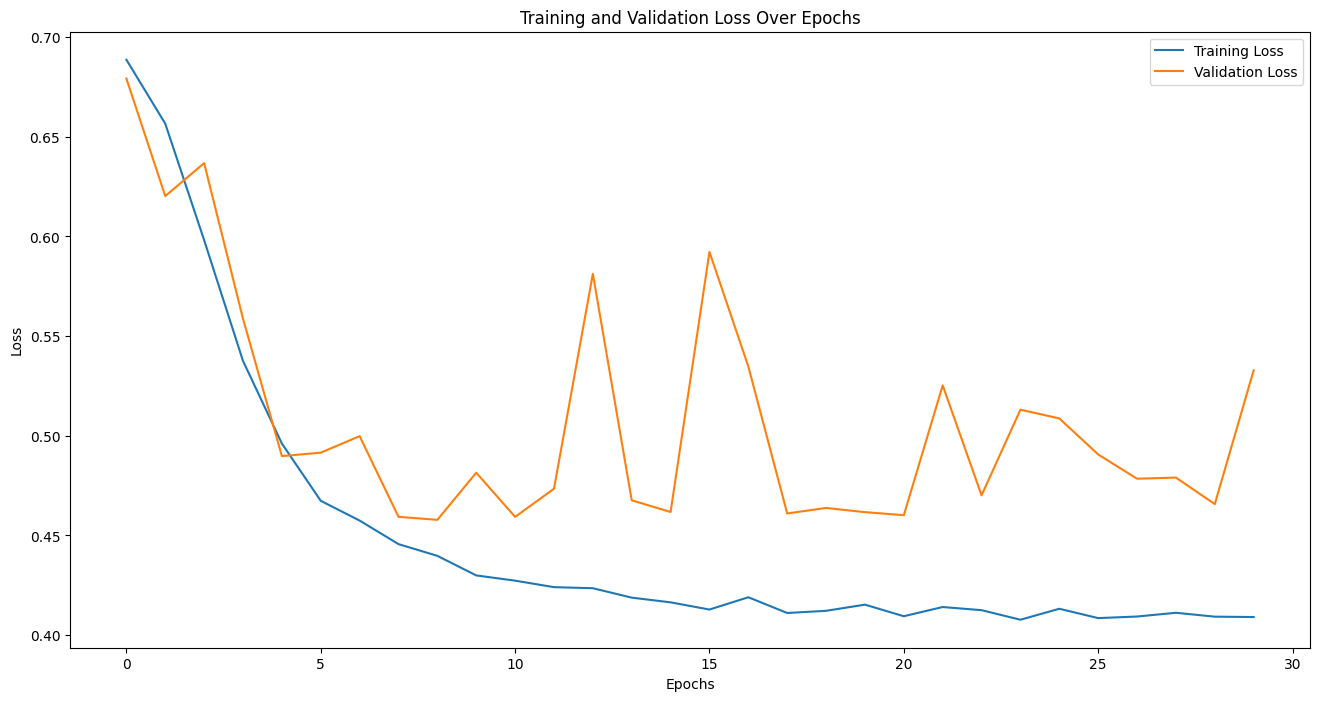

In [27]:
# Extract history
result = model_history.history

# Define epochs and loss data
epochs = [i for i in range(len(result['loss']))]  
lss = result['loss']
val_lss = result['val_loss']

# Plot loss and validation loss
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=lss, label='Training Loss')  
sns.lineplot(x=epochs, y=val_lss, label='Validation Loss') 

# Add labels and legend
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()

# Show plot
plt.show()

The loss on the validation set is **rising**, but **much slower than before** 

$\Rightarrow$ Reducing the size of the vocabulary to prevent the training set from **overfitting** on low-frequency words

**Note**
- Experimenting with different vocab sizes, but remember that we can also have too small a vocab size and **overfit** to that $\rightarrow$ find a balance

### **Exploring embedding dimensions**

**An embedding dimension of 16** was **arbitrarily chosen**. 

In this instance, words are **encoded** as vectors in **16-dimensional space**, with their directions indicating their overall meaning. 

**But is 16 a good number?** $\Rightarrow$ Only **2000 words** in vocabulary $\rightarrow$ be on the high side $\rightarrow$ a high degree of sparseness of direction

**Best practice for embedding size** is to have it $\sqrt[4]{vocal\_size}$ $\rightarrow$ the fourth root of 2,000 is 6.687

In [28]:
vocal_size = 2000
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words=vocal_size, oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)

In [29]:
train_sequence = tokenizer.texts_to_sequences(train_set)
test_sequence = tokenizer.texts_to_sequences(test_set)


train_sequence_padded = pad_sequences(train_sequence, padding='post', maxlen=100)  
test_sequence_padded = pad_sequences(test_sequence, padding='post', maxlen=100)  

In [30]:
# As an example, consider this model architecture:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(2000, 7),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_history = model.fit(train_sequence_padded, train_label, validation_data=(test_sequence_padded, test_label), epochs=100)

Epoch 1/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5165 - loss: 0.6921 - val_accuracy: 0.5275 - val_loss: 0.6903
Epoch 2/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5592 - loss: 0.6819 - val_accuracy: 0.6418 - val_loss: 0.6355
Epoch 3/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6454 - loss: 0.6305 - val_accuracy: 0.7042 - val_loss: 0.5699
Epoch 4/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7103 - loss: 0.5613 - val_accuracy: 0.7476 - val_loss: 0.5105
Epoch 5/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7490 - loss: 0.5049 - val_accuracy: 0.7606 - val_loss: 0.4849
Epoch 6/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7663 - loss: 0.4770 - val_accuracy: 0.7551 - val_loss: 0.4900
Epoch 7/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7836 - loss: 0.4586 - val_accuracy: 0.7653 - val_loss: 0.4726
Epoch 8/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7753 - loss: 0.4520 - val_accu

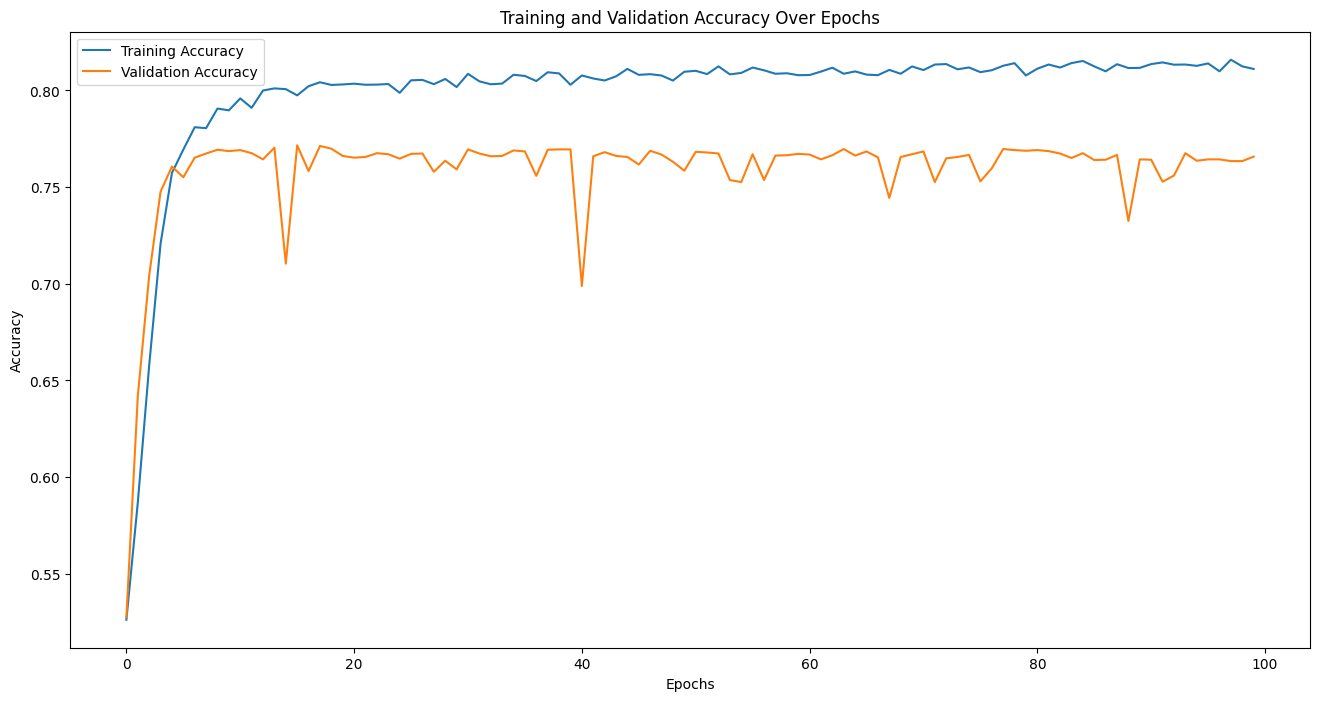

In [31]:
# Extract history
result = model_history.history

# Define epochs and accuracy data
epochs = [i for i in range(len(result['accuracy']))]  
acc = result['accuracy']
val_acc = result['val_accuracy']

# Plot accuracy and validation accuracy
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=acc, label='Training Accuracy')  
sns.lineplot(x=epochs, y=val_acc, label='Validation Accuracy') 

# Add labels and legend
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()

# Show plot
plt.show()

The training set’s accuracy **stabilized** at about **83%** and the validation set’s at about **77%**
- The lines are pretty flat $\rightarrow$ the model has converged $\rightarrow$ isn’t much different from the results as before
- Reducing the embedding dimensionality allows the model to train over **30%** faster

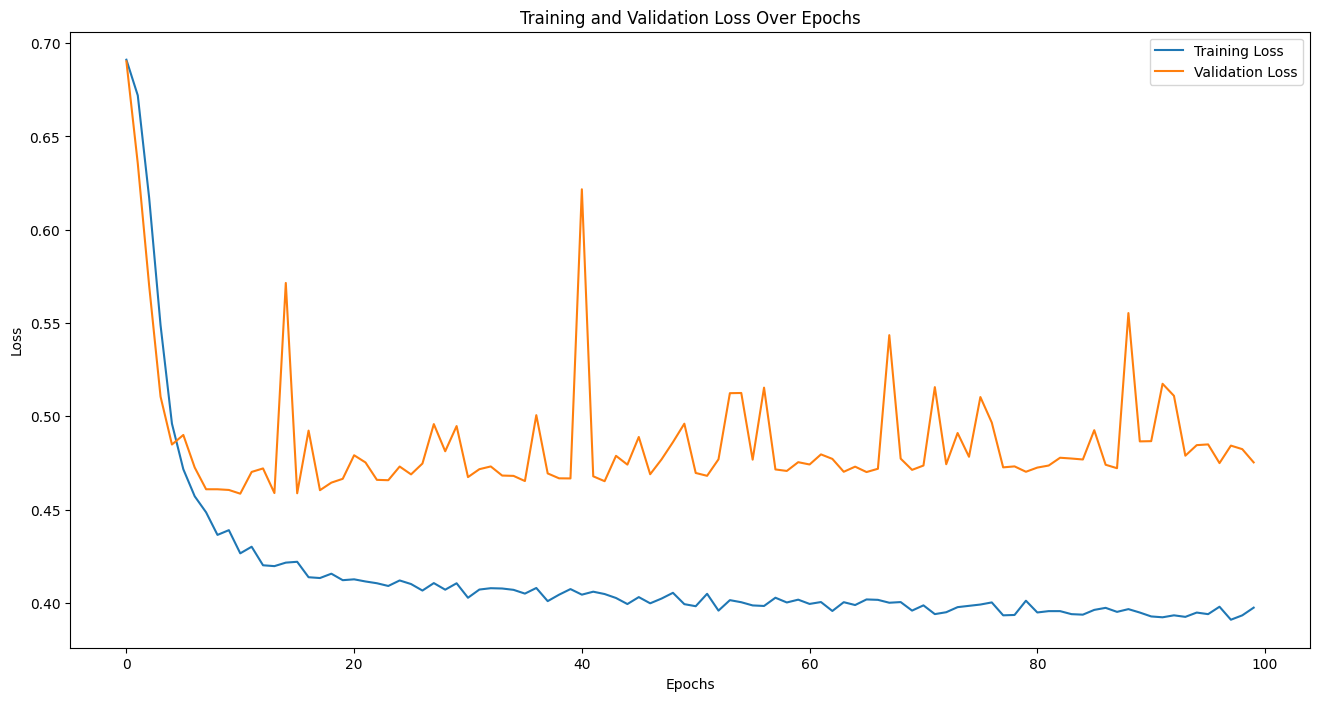

In [32]:
# Extract history
result = model_history.history

# Define epochs and loss data
epochs = [i for i in range(len(result['loss']))]  
lss = result['loss']
val_lss = result['val_loss']

# Plot loss and validation loss
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=lss, label='Training Loss')  
sns.lineplot(x=epochs, y=val_lss, label='Validation Loss') 

# Add labels and legend
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()

# Show plot
plt.show()

The loss was **climbing** at **about epoch 20**, it soon kinda flattened out $\rightarrow$ a good sign!

### **Exploring the model architecture**

After the optimizations, the model architecture looks like

```Python
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(2000, 7),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

```


**The dimensionality**—**the GlobalAveragePooling1D layer** is now emitting just seven dimensions, but fed into a dense layer of 24 neurons $\rightarrow$ overkill. 

**Let’s explore what happens when this is reduced to just eight neurons and trained for one hundred epochs.**

In [33]:
# As an example, consider this model architecture:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(2000, 7),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_history = model.fit(train_sequence_padded, train_label, validation_data=(test_sequence_padded, test_label), epochs=100)

Epoch 1/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5251 - loss: 0.6918 - val_accuracy: 0.5407 - val_loss: 0.6892
Epoch 2/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5443 - loss: 0.6876 - val_accuracy: 0.6200 - val_loss: 0.6679
Epoch 3/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6076 - loss: 0.6624 - val_accuracy: 0.6341 - val_loss: 0.6285
Epoch 4/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6580 - loss: 0.6203 - val_accuracy: 0.6946 - val_loss: 0.5832
Epoch 5/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7032 - loss: 0.5773 - val_accuracy: 0.7370 - val_loss: 0.5386
Epoch 6/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7409 - loss: 0.5327 - val_accuracy: 0.7391 - val_loss: 0.5214
Epoch 7/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7553 - loss: 0.5047 - val_accuracy: 0.7441 - val_loss: 0.5048
Epoch 8/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7755 - loss: 0.4743 - val_accu

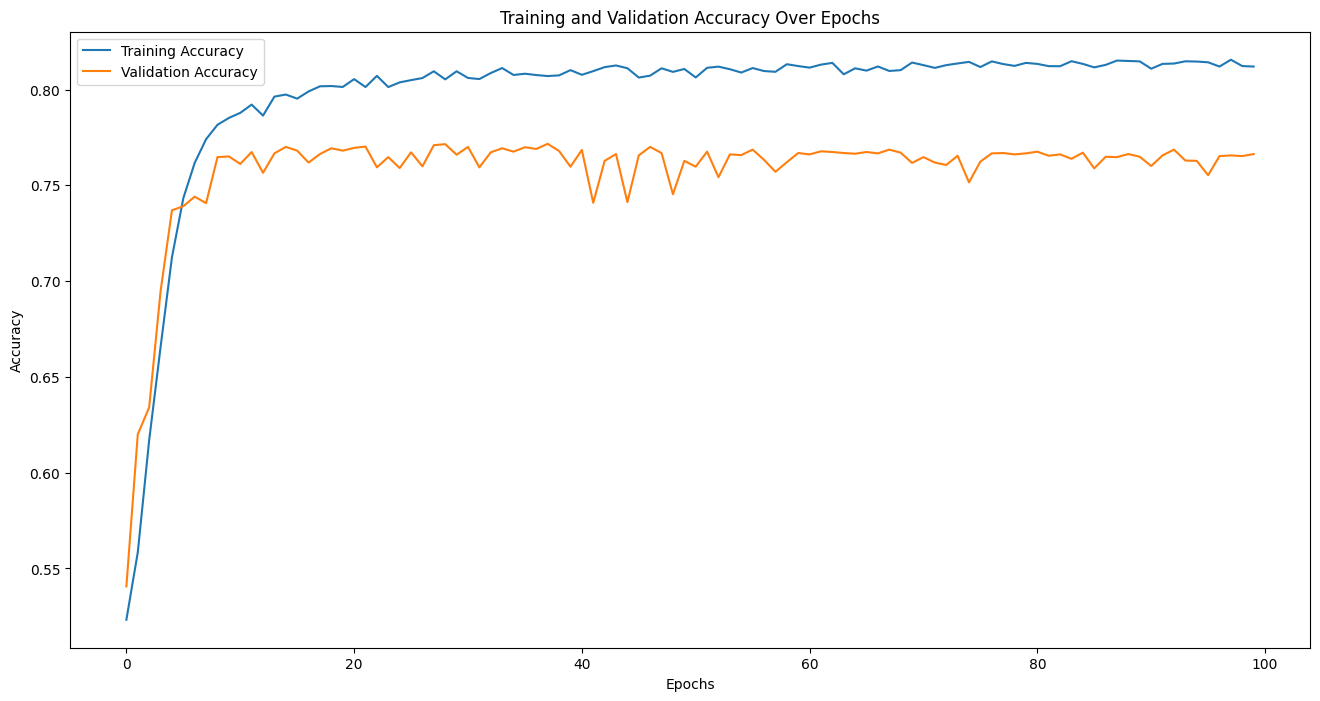

In [34]:
# Extract history
result = model_history.history

# Define epochs and accuracy data
epochs = [i for i in range(len(result['accuracy']))]  
acc = result['accuracy']
val_acc = result['val_accuracy']

# Plot accuracy and validation accuracy
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=acc, label='Training Accuracy')  
sns.lineplot(x=epochs, y=val_acc, label='Validation Accuracy') 

# Add labels and legend
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()

# Show plot
plt.show()

When compared to model which 24 neurons were used, **the overall result is quite similar**, but **the fluctuations** have been **smoothed out** $\rightarrow$ the lines being less jaggy $\rightarrow$ somewhat faster to train.

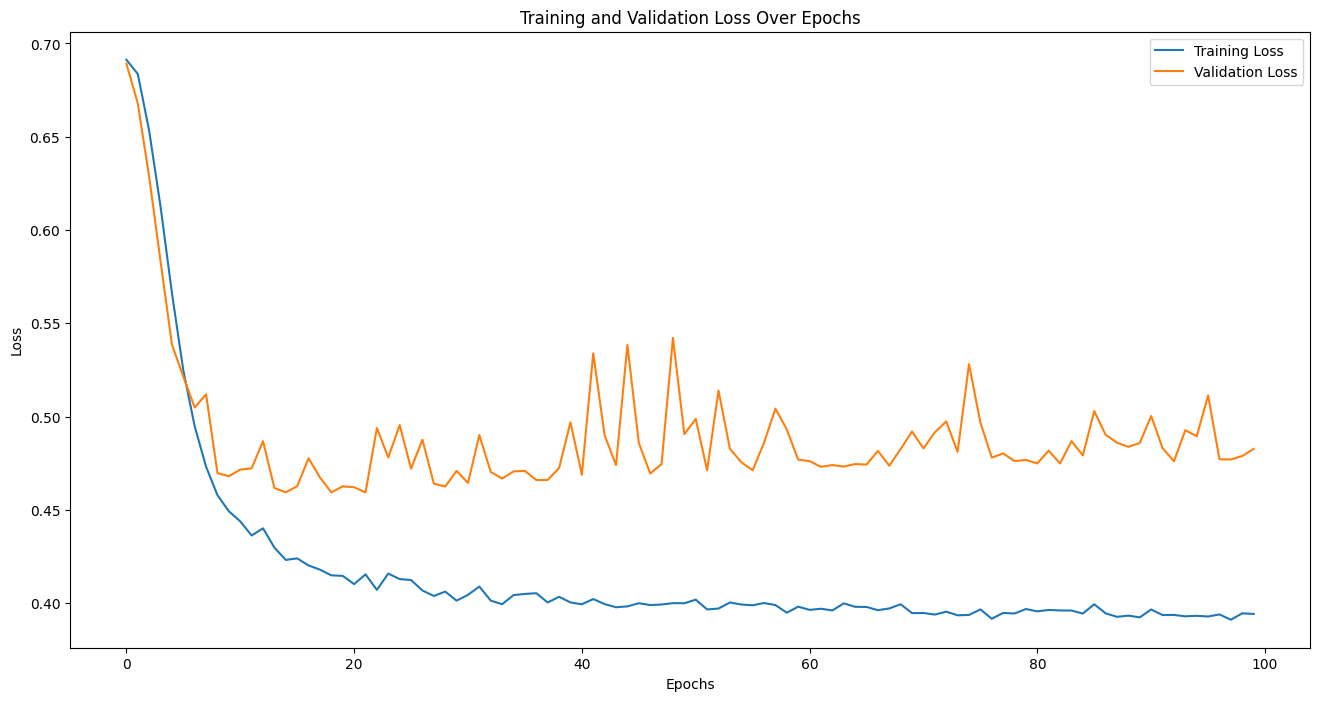

In [35]:
# Extract history
result = model_history.history

# Define epochs and loss data
epochs = [i for i in range(len(result['loss']))]  
lss = result['loss']
val_lss = result['val_loss']

# Plot loss and validation loss
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=lss, label='Training Loss')  
sns.lineplot(x=epochs, y=val_lss, label='Validation Loss') 

# Add labels and legend
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()

# Show plot
plt.show()

Similarly, the loss curves show **similar results**, but with **the jagginess reduced a little bit**


### **Using dropout**

Adding **`dropout`** to a dense neural network for reducing **overfitting** 

The **vocabulary size**, **embedding size** and **architecture complexity** changes can often have a much larger impact than using **dropout**

The architecture has been simplified to have only eight neurons in the middle dense layer $\rightarrow$ the effect of dropout may be minimized

In [36]:
# As an example, consider this model architecture:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(2000, 7),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_history = model.fit(train_sequence_padded, train_label, validation_data=(test_sequence_padded, test_label), epochs=100)

Epoch 1/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5187 - loss: 0.6927 - val_accuracy: 0.5273 - val_loss: 0.6904
Epoch 2/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5342 - loss: 0.6903 - val_accuracy: 0.5647 - val_loss: 0.6792
Epoch 3/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5797 - loss: 0.6779 - val_accuracy: 0.6069 - val_loss: 0.6581
Epoch 4/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6038 - loss: 0.6587 - val_accuracy: 0.6298 - val_loss: 0.6390
Epoch 5/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6284 - loss: 0.6357 - val_accuracy: 0.7174 - val_loss: 0.5880
Epoch 6/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6846 - loss: 0.5932 - val_accuracy: 0.7363 - val_loss: 0.5465
Epoch 7/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7203 - loss: 0.5504 - val_accuracy: 0.7418 - val_loss: 0.5238
Epoch 8/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7425 - loss: 0.5197 - val_accu

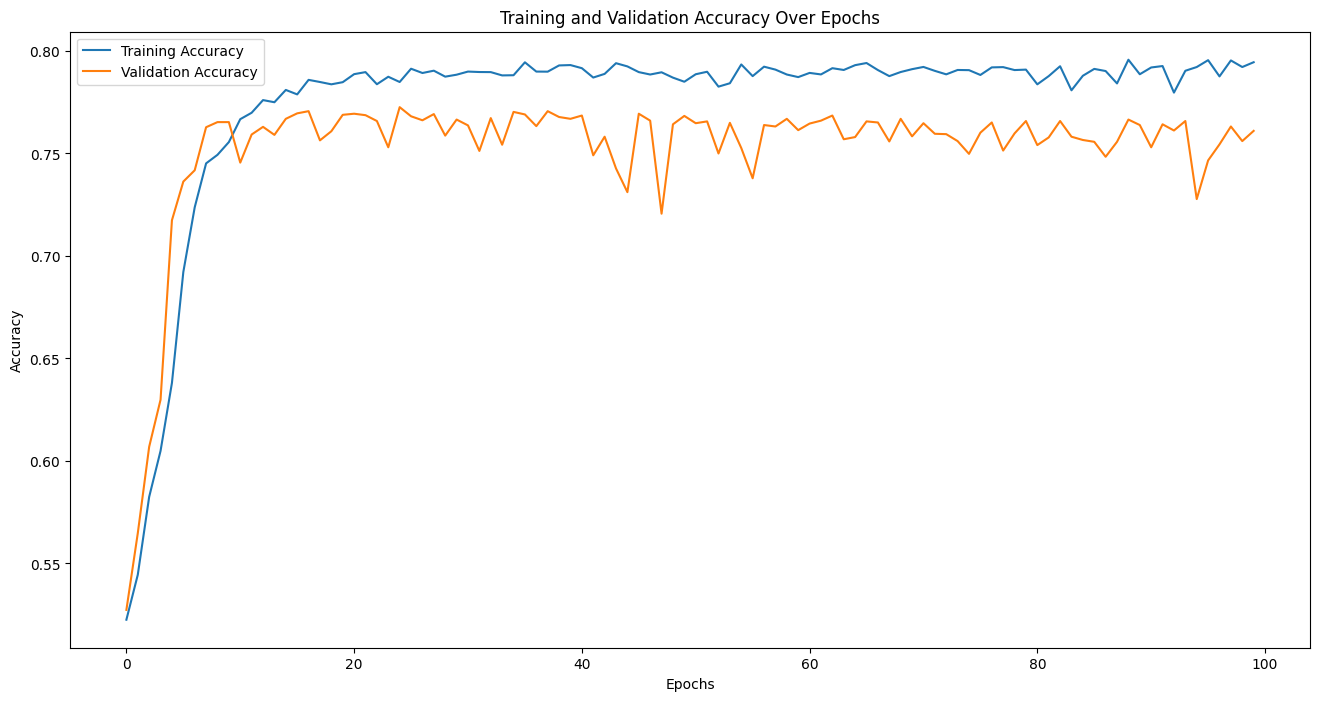

In [37]:
# Extract history
result = model_history.history

# Define epochs and accuracy data
epochs = [i for i in range(len(result['accuracy']))]  
acc = result['accuracy']
val_acc = result['val_accuracy']

# Plot accuracy and validation accuracy
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=acc, label='Training Accuracy')  
sns.lineplot(x=epochs, y=val_acc, label='Validation Accuracy') 

# Add labels and legend
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()

# Show plot
plt.show()

The training accuracy is **climbing above its previous threshold**, while the validation accuracy is **slowly dropping** $\rightarrow$ a sign of entering **overfitting** territory again and is confirmed by exploring the loss curves

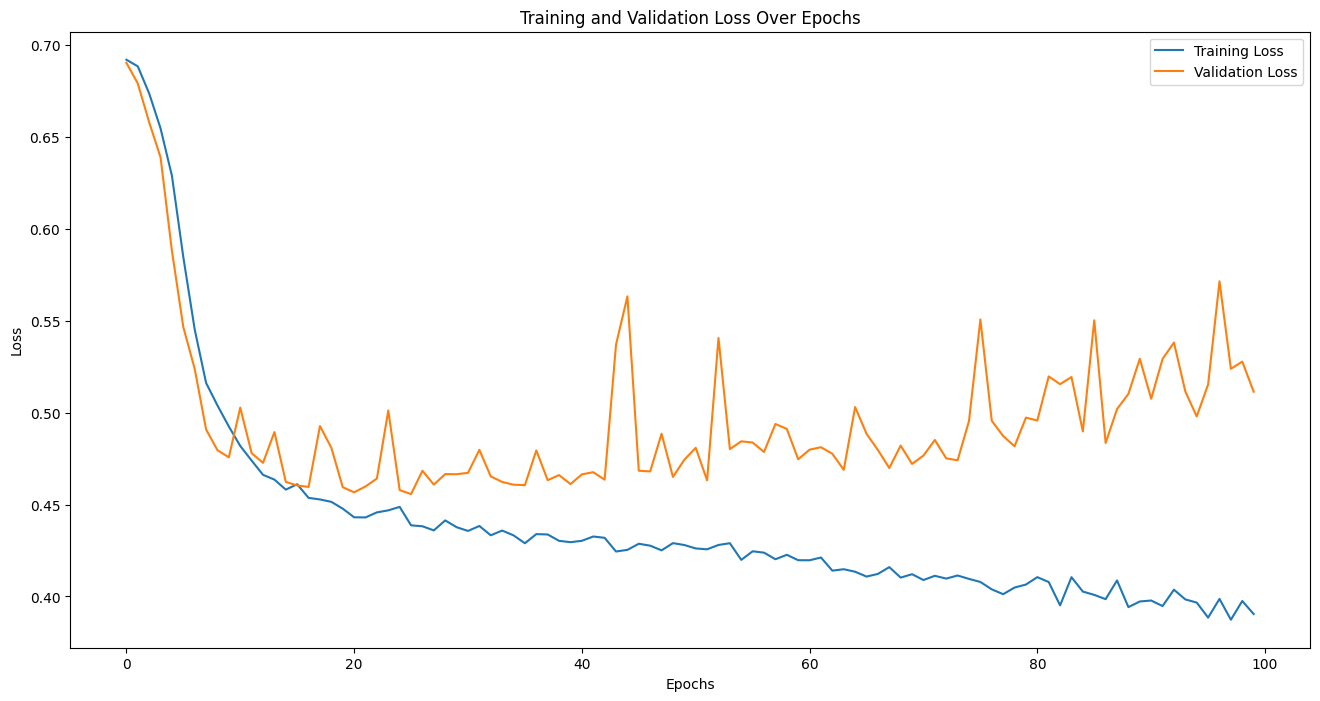

In [38]:
# Extract history
result = model_history.history

# Define epochs and loss data
epochs = [i for i in range(len(result['loss']))]  
lss = result['loss']
val_lss = result['val_loss']

# Plot loss and validation loss
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=lss, label='Training Loss')  
sns.lineplot(x=epochs, y=val_lss, label='Validation Loss') 

# Add labels and legend
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()

# Show plot
plt.show()

The model is heading back to its previous pattern of increasing validation loss over time $\rightarrow$ not nearly as bad as before, but it’s heading in the wrong direction

In this case, when there were **very few neurons** $\Rightarrow$ **introducing dropout probably wasn’t the right idea**

It’s still **good to have this tool in your arsenal though**, so be sure to **keep it in mind for more sophisticated architectures than this one**

### **Using regularization**

**Regularization** helps **prevent overfitting** by **reducing the polarization of weights** $\rightarrow$ If the **weights** on some of the neurons are **too heavy**, regularization **punishes them**

There are two types of regularization: ***`L1`*** and ***`L2`***

- **L1 regularization** or **lasso** (**least absolute shrinkage and selection operator**) regularization $\Rightarrow$ **Ignore** the **zero** or **close-to-zero weights** when calculating a result in a layer

- **L2 regularization** or **ridge regression** because it **pushes values apart by taking their squares** $\rightarrow$ Tends to **amplify the differences between nonzero values and zero or close-to-zero ones**, creating a ridge effect

- The two approaches can also be **combined into** called **elastic regularization**.

For NLP problems, ***`L2`*** is most commonly used.

In [39]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(2000, 7),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(8, activation='relu', 
                kernel_regularizer = tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

The impact of **adding regularization** in a simple model is not particularly large, but it does smooth out the training loss and validation loss somewhat

It might be **OVERKILL** for this scenario, but like **dropout**, it's a good idea to understand how to use regularization to prevent the model from getting overspecialized

### **Other optimization considerations**

While the modifications above given us a much improved model with less **overfitting**, there are other **hyperparameters** can experimented with

**For example**, making the maximum sentence length one hundred, but this was purely arbitrary and probably not optimal $\rightarrow$ need to explore the corpus and see what a better sentence length might be

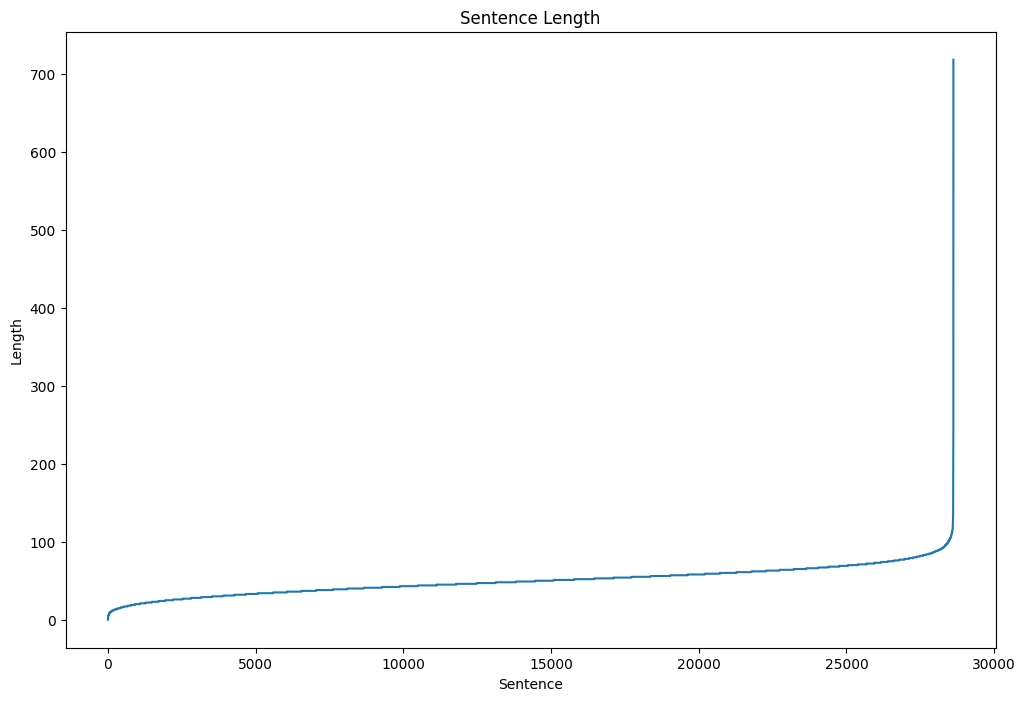

In [40]:
xs=[]
ys=[]
current_item=1

for item in sentences:
    xs.append(current_item)
    current_item=current_item+1
    ys.append(len(item))
newys = sorted(ys)

plt.figure(figsize=(12, 8))
plt.title('Sentence Length')
plt.xlabel('Sentence')
plt.ylabel('Length')
plt.plot(xs,newys)
plt.show()

**Less than 200 sentences** in the total corpus of **26,000+** have **a length of 100 words or greater** $\Rightarrow$ **Choosing this as the max length**, we’re introducing **a lot of padding** that **isn’t necessary**, and **affecting the model’s performance** 

**Reducing** it to **85** still **keeps 26,000 of the sentences (99%+) without any padding at all**

### **Using the Model to Classify a Sentence**

In [41]:
sentences = ["granny starting to fear spiders in the garden might be real", 
"game of thrones season finale showing this sunday night", 
"TensorFlow book will be a best seller"]

Encoded using the same tokenizer that was used when creating the vocabulary for training

In [42]:
sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)

[[1, 556, 1, 699, 1, 1, 1, 1, 1, 1, 83], [90, 1, 969, 154, 1, 1, 1, 1496, 125], [1, 192, 1, 1, 1, 39, 1]]


Need to be in the shape that the model expects before passing the sequences to the model

In [43]:
padded = pad_sequences(sequences, maxlen=100, 
    padding='post', truncating='post')
print(padded)

[[   1  556    1  699    1    1    1    1    1    1   83    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [  90    1  969  154    1    1    1 1496  125    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0

In [44]:
print(model.predict(padded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
[[0.5090638 ]
 [0.5089443 ]
 [0.50940543]]


**The high score for the first sentence**, despite it having a lot of stopwords and being padded with a lot of zeros, indicates that there is **a high level of sarcasm here**

The other two sentences **scored much lower**, indicating **a lower likelihood of sarcasm within**

### **Visualizing the Embeddings**

$\Rightarrow$ Use **Embedding Projector** (a tool)

**How to take the data from the trained model and visualize it using this tool?**

**1. Reverse the word index**

It currently has ***the word as the token*** and ***the key as the value*** $\rightarrow$ needs to be inverted $\rightarrow$ **have word values to plot** on the **projector**

In [45]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

reverse_word_index

{1: '<OOV>',
 2: 'new',
 3: 'trump',
 4: 'man',
 5: 'report',
 6: 'year',
 7: 'day',
 8: 'woman',
 9: 'u',
 10: 'area',
 11: 's',
 12: 'time',
 13: 'says',
 14: 'donald',
 15: 'like',
 16: 'old',
 17: 'life',
 18: 'people',
 19: 'trumps',
 20: 'house',
 21: 'white',
 22: 'obama',
 23: 'women',
 24: '5',
 25: 'clinton',
 26: 'world',
 27: 'years',
 28: 'family',
 29: 'way',
 30: 'americans',
 31: 'black',
 32: 'study',
 33: 'american',
 34: 'school',
 35: 'gop',
 36: 'bill',
 37: '3',
 38: 'finds',
 39: 'best',
 40: 'nation',
 41: 'know',
 42: 'cant',
 43: 'police',
 44: 'going',
 45: '10',
 46: 'watch',
 47: 'good',
 48: 'death',
 49: 'state',
 50: 'home',
 51: 'president',
 52: 'video',
 53: '2',
 54: 'big',
 55: 'things',
 56: 'love',
 57: 'parents',
 58: 'campaign',
 59: 'mom',
 60: 'right',
 61: 'health',
 62: 'getting',
 63: 'party',
 64: 'work',
 65: 'hillary',
 66: 'kids',
 67: '000',
 68: 'self',
 69: 'gets',
 70: 'dead',
 71: 'little',
 72: 'high',
 73: 'need',
 74: 'doesnt',


**2. Extract the weights of the vectors in the embeddings**

In [46]:
e = model.layers[0] # Layer 0 is the embedding layer

weights = e.get_weights()[0] # Get the weights of the embedding layer
print(weights.shape)

(2000, 7)


In [47]:
print(reverse_word_index[2])
print(weights[2])

new
[ 0.02517058  0.03313986  0.01727548 -0.02434593  0.01977215  0.0129039
 -0.02689027]


**The word “new” is represented by a vector with those seven coefficients on its axes**

**The Embedding Projector** uses **two tab-separated values (TSV) files**, one for **the vector dimensions** and one for **metadata**

In [48]:
import io  # Input/Output operations

out_v = io.open('vecs.tsv', 'w', encoding='utf-8') # Open a file to write the vectors
out_m = io.open('meta.tsv', 'w', encoding='utf-8') # Open a file to write the metadata

for word_num in range(1, vocal_size):
    word = reverse_word_index[word_num] # Get the word
    embeddings = weights[word_num] # Get the word's embedding
    
    out_m.write(word + '\n') # Write the word to the metadata file
    out_v.write('\t'.join([str(x) for x in embeddings]) + '\n') # Write the word's embedding to the vectors file

out_v.close()
out_m.close()

**3. Press the Load button on the projector to visualize the embeddings**

**Use the vectors and meta TSV files** then **click Sphereize Data on the projector**. This cause the words to be clustered on a sphere and give us a clear visualization of **the binary nature of this classifier (sarcastic or non-sarcastic)**